# Cost of Living March 2025

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties

The salary data represents the median salary from Glassdoor, adjusted for local income taxes using a city-specific tax calculator based on the applicable country or state tax rates.

In [61]:
data = [
    {
        "City": "New York",
        "Cost of Living": 100,    # https://www.numbeo.com/cost-of-living/rankings_current.jsp
        "Salary": 11000,
        "Population": 8.25,  # in millions
        "Continent": "North America"
    },
    {
        "City": "Amsterdam",
        "Cost of Living": 68,
        "Salary": 4300,
        "Population": 1,
        "Continent": "Europe"
    },
    {
        "City": "Chicago",
        "Cost of Living": 73,
        "Salary": 9800,
        "Population": 2.6,
        "Continent": "North America"
    },
    {
        "City": "Hong Kong",
        "Cost of Living": 74,
        "Salary": 4200,
        "Population": 7.5,
        "Continent": "Asia"
    },
    {
        "City": "Zurich",
        "Cost of Living": 104,
        "Salary": 10000,
        "Population": 0.4,
        "Continent": "Europe"
    },
    {
        "City": "Sydney",
        "Cost of Living": 68,
        "Salary": 5000,
        "Population": 5.2,
        "Continent": "Oceania"
    },
    {
        "City": "Barcelona",
        "Cost of Living": 51,
        "Salary": 3000,
        "Population": 1.6,
        "Continent": "Europe"
    },
    {
        "City": "Tallinn",
        "Cost of Living": 54,
        "Salary": 3200,
        "Population": 0.4,
        "Continent": "Europe"
    },
    {
        "City": "Dublin",
        "Cost of Living": 65,
        "Salary": 4100,
        "Population": 0.6,
        "Continent": "Europe"
    },
    {
        "City": "Boston",
        "Cost of Living": 83,
        "Salary": 10000,
        "Population": 0.65,
        "Continent": "North America"
    },
    {
        "City": "Seoul",
        "Cost of Living": 64,
        "Salary": 3400,
        "Population": 9.4,
        "Continent": "Asia"
    },
    {
        "City": "Philadelphia",
        "Cost of Living": 75,
        "Salary": 9200,
        "Population": 1.5,
        "Continent": "North America"
    },
    {
        "City": "Washington, D.C.",
        "Cost of Living": 81,
        "Salary": 9400,
        "Population": 0.6,
        "Continent": "North America"
    }
]

In [62]:
df = pd.DataFrame(data)

# --------------------------
# colors for continents
# --------------------------
continent_colors = {
    "Europe": "#A85DA9",    # Blue
    "Asia": "#E9999C",      # Orange
    "North America": "#E5BBEC",  # Green
    "Oceania": "#5F8CA9",   # Purple
    "South America": "#F3C8B6"  
}

# Assign colors to DataFrame
df["Color"] = df["Continent"].map(continent_colors)

In [63]:
personal_path = '../../Fonts_GT_Super/Desktop'
font_path = personal_path + '/GT-Eesti/GT-Eesti-Text-Book-Trial.otf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + '/GT-Eesti/GT-Eesti-Display-Bold-Trial.otf')

In [64]:
title = font.copy()
title.set_size(18) 

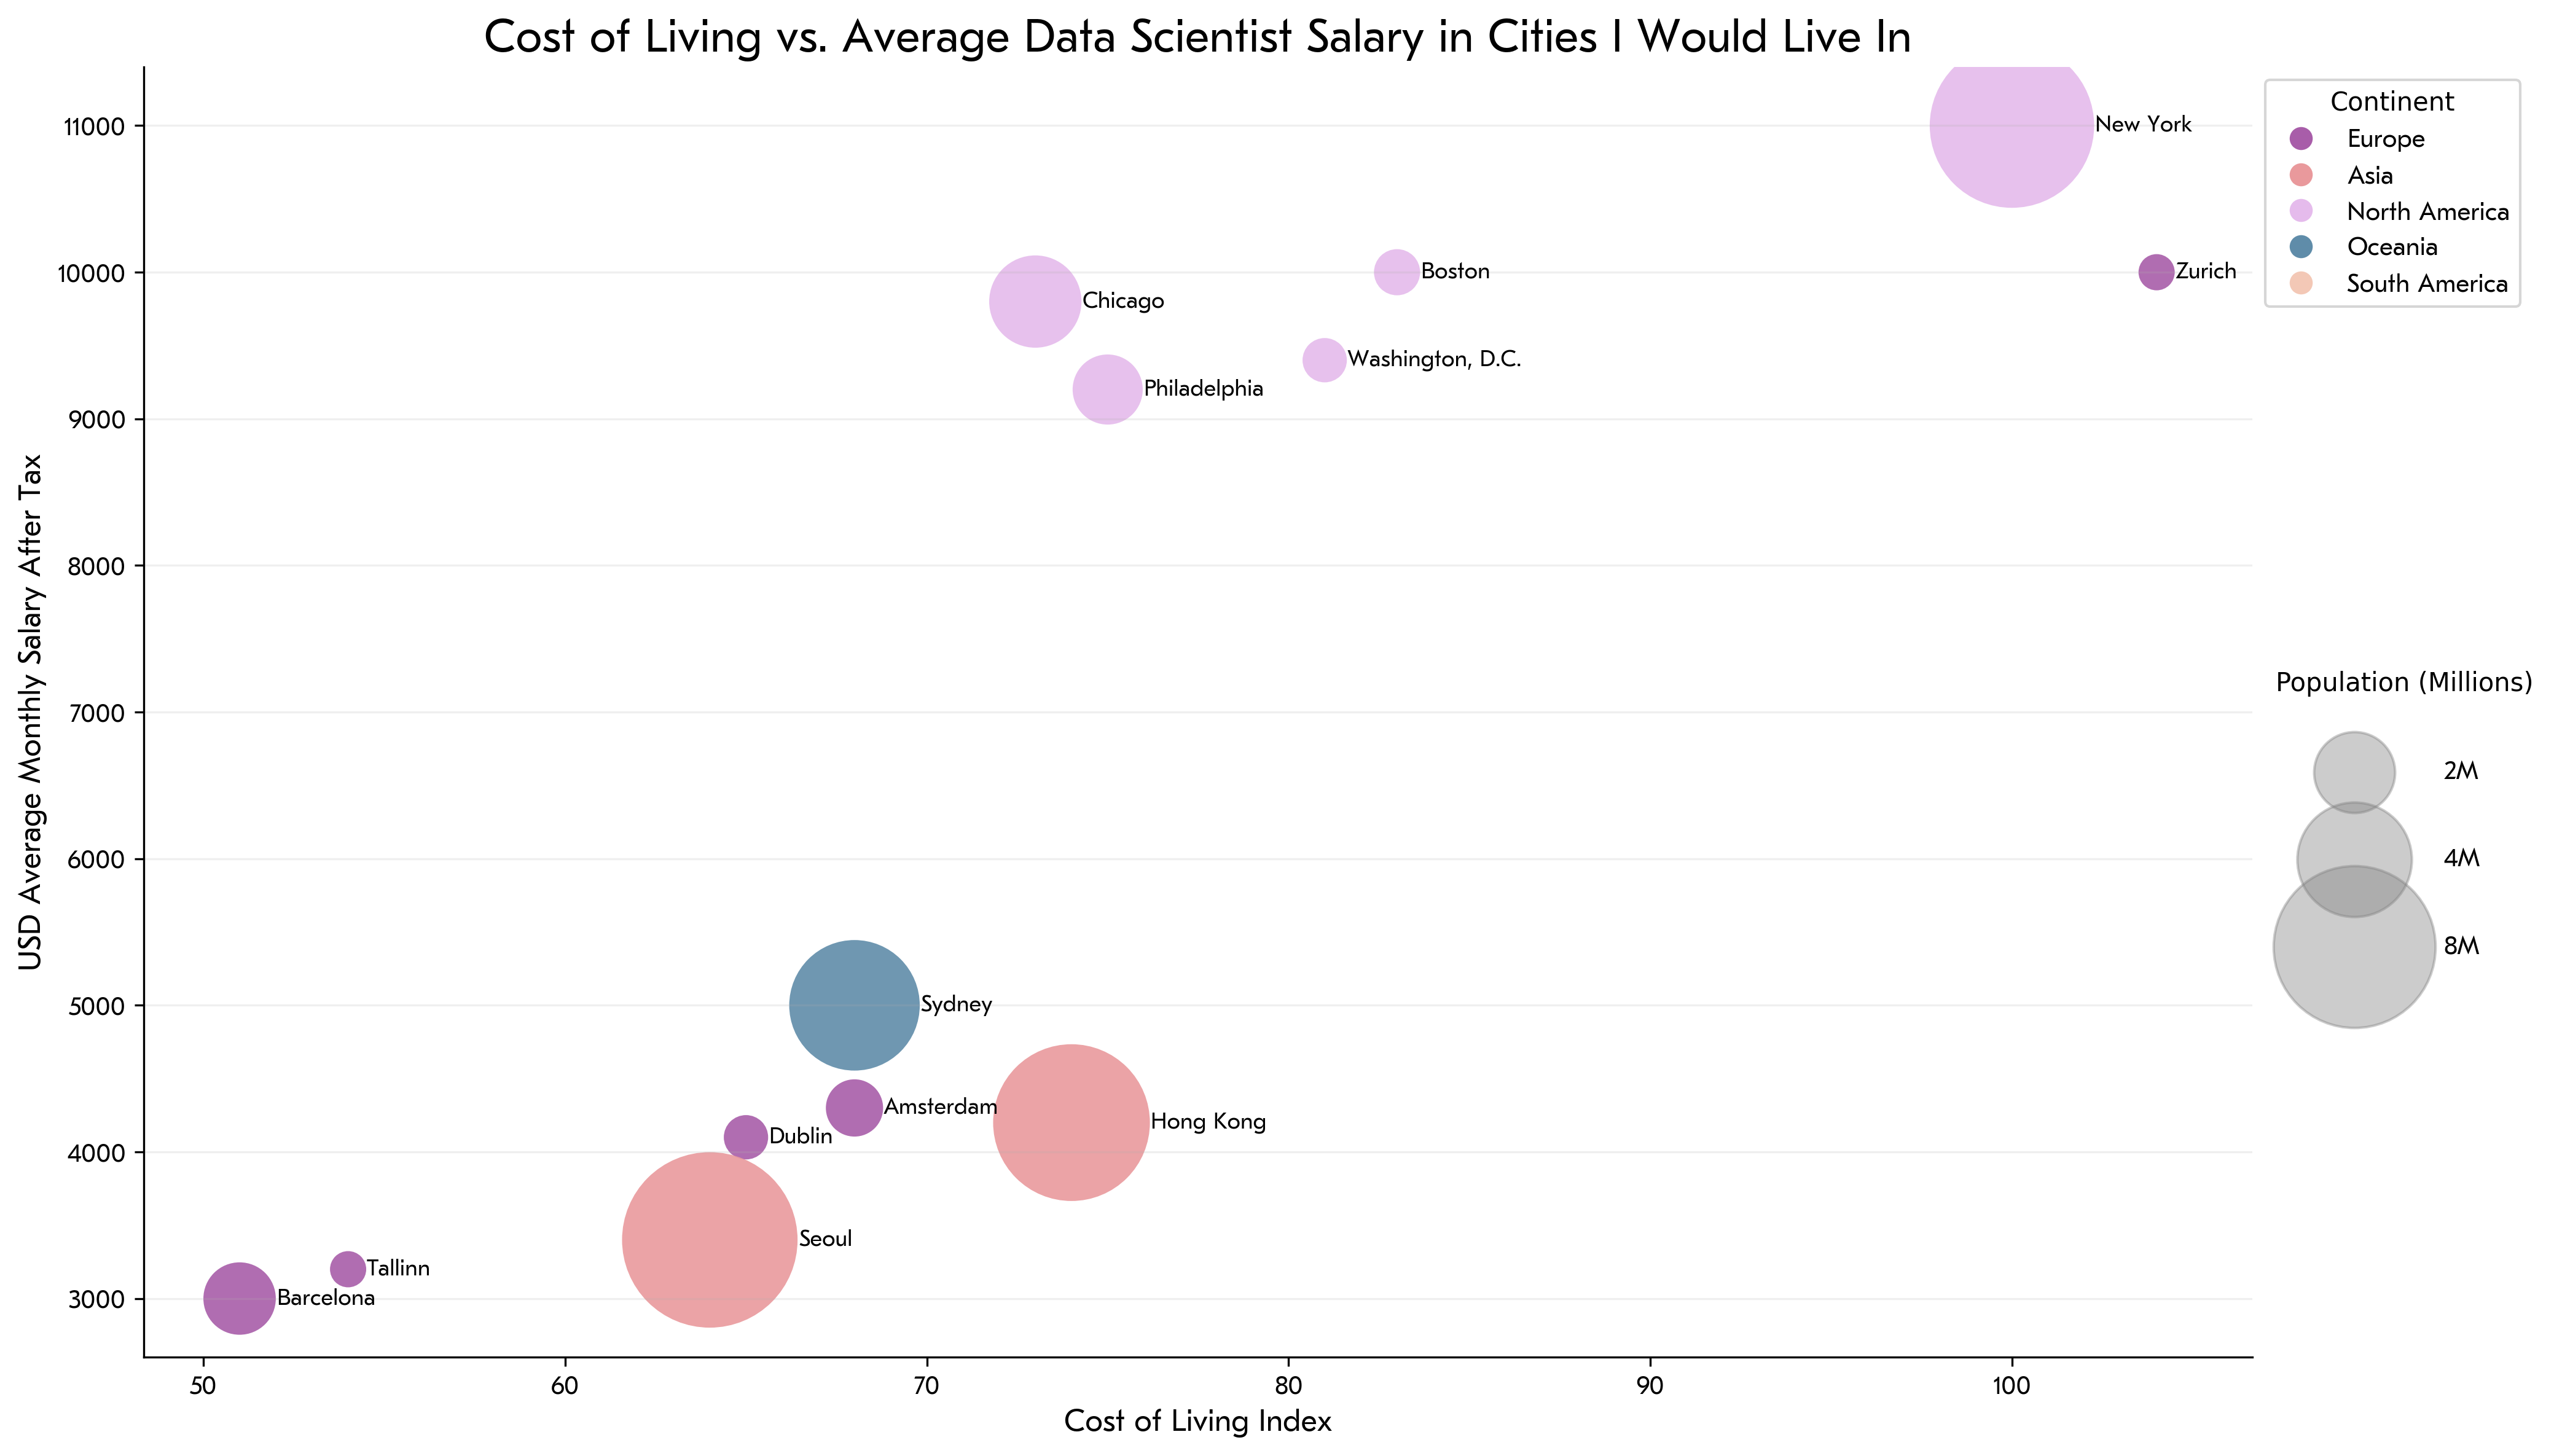

In [94]:
plt.figure(figsize=(14, 8), dpi=300)
ax = plt.gca() 

scatter = plt.scatter(
    x=df["Cost of Living"],
    y=df["Salary"],
    s=df["Population"] * 500,  # Adjust bubble size scaling
    c=df["Color"],            # Color by continent
    alpha=0.9,
    edgecolors="k",
    linewidth=0
)

# Add city labels
for i, row in df.iterrows():
    # Calculate radius of the circle (in points)
    radius = np.sqrt(row["Population"] * 500 / np.pi)
    
    # Calculate offset based on the radius (converting to data coordinates)
    # This is an approximation, as converting from points to data coordinates 
    # depends on the figure size and axis limits
    x_range = plt.xlim()[1] - plt.xlim()[0]
    y_range = plt.ylim()[1] - plt.ylim()[0]
    fig_width, fig_height = plt.gcf().get_size_inches()
    
    # Convert radius from points to data coordinates
    x_radius_offset = radius * x_range / (fig_width * 72)  # 72 points per inch
    y_radius_offset = radius * y_range / (fig_height * 72)
    
    # Position label slightly outside the circle's edge
    # Using a small additional buffer (1.1) to ensure it's outside
    plt.annotate(
        row["City"],
        (row["Cost of Living"] + x_radius_offset * 1.1, row["Salary"]),
        fontsize=9,
        ha="left",
        va="center",
        font=font
    )

# Customize plot
plt.xlabel("Cost of Living Index", fontsize=12, font=font)
plt.ylabel("USD Average Monthly Salary After Tax", fontsize=12, font=font)
plt.title("Cost of Living vs. Average Data Scientist Salary in Cities I Would Live In", fontsize=14, font=title)
plt.grid(True, alpha=0.3)

# Legend for continents
legend_elements = [
    Line2D([0], [0], marker="o", color="w", label=continent,
           markerfacecolor=color, markersize=10)
    for continent, color in continent_colors.items()
]
plt.legend(
    handles=legend_elements,
    title="Continent",
    loc="upper left",
    bbox_to_anchor=(1, 1)
)

# --- Legend 1: Continents ---
continent_legend_elements = [
    Line2D([0], [0], marker="o", color="w", label=continent,
           markerfacecolor=color, markersize=10)
    for continent, color in continent_colors.items()
]
continent_legend = plt.legend(
    handles=continent_legend_elements,
    title="Continent",
    loc="upper left",
    bbox_to_anchor=(1, 1),  # Place legend outside the plot
    prop=font
)
ax.add_artist(continent_legend)  # Add the first legend manually

# --- Legend 2: Population Sizes ---
population_sizes = [2, 4, 8]  

for size in population_sizes:
    ax.scatter([], [], s=size * 500, color="gray", alpha=0.4, label=f"{size}M")

population_legend = plt.legend(
    title="Population (Millions)",
    loc="upper left",
    bbox_to_anchor=(1, 0.55),  # Adjusted for better spacing
    prop=font,
    frameon=False,  # Remove the box
    labelspacing=2.5,
    handletextpad=2.5
)

ax.spines[['top', 'right']].set_visible(False)
plt.grid(False)
ax.yaxis.grid(True, alpha=0.2)
for tick in ax.get_xticklabels():
    tick.set_fontproperties(font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(font) 

plt.tight_layout()
plt.savefig('cost_of_living_DS.png', bbox_inches='tight', dpi=300)
plt.show()